In [1]:
from spacy.lang.pl import Polish
from spacy.tokenizer import Tokenizer
nlp = Polish()
tokenizer = Tokenizer(nlp.vocab)

In [2]:
from os import listdir
from os.path import isfile,join
billPath = './bills/'
bills = [f for f in listdir(billPath) if isfile(join(billPath, f))]
len(bills)
# bills_tokens = []
frequency_bills = []

for b in bills:
    bPath = billPath + b
    f = open(bPath,encoding='utf-8')
    content = f.read()
    content = content.lower()
    tokens = tokenizer(content)
    frequency = {}
    for t in tokens:
        k = t.text
        frequency[k] = frequency.get(k,0) + 1
    frequency_bills.append([bPath,frequency])
#     bills_tokens.append(tokens)

# print(len(bills_tokens))

In [3]:
global_frequency = {}

for tmp in frequency_bills:
    bPath,frequency = tmp[0], tmp[1]
    for f in frequency:
        global_frequency[f] = global_frequency.get(f,0) + frequency[f]

len(global_frequency)

135516

In [4]:
#reject shorter than 2
import regex as re

to_remove = []

for k in global_frequency: 
    tmp = re.search(r"\p{L}+",k)
    t = 0 if tmp is None else len(tmp.group(0))
    if t < 2 or t != len(k):
        to_remove.append(k)

for r in to_remove:
    global_frequency.pop(r)

len(global_frequency)

48909

In [5]:
list_of_words = []
for i in global_frequency:
    list_of_words.append([i,global_frequency[i]])

list_of_words.sort(key = lambda a: -a[1])


In [6]:
list_of_words[0]

['do', 60402]

In [7]:
len(list_of_words)

48909

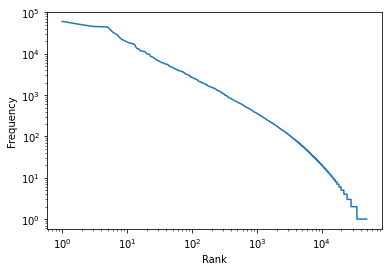

In [8]:
import matplotlib.pyplot as plt
x = [i for i in range(1,len(list_of_words)+1)]
y = []
for t in list_of_words:
    w,c = t[0],t[1]
    y.append(c)

plt.plot(x,y)
plt.ylabel('Frequency')
plt.xlabel('Rank')
plt.yscale('log')
plt.xscale('log')

plt.show()

In [6]:
#wczytać dane
polimorfologik_path = ".\polimorf\polimorfologik-2.1.txt"
f=open(polimorfologik_path,"r",encoding='utf-8')
lines=f.readlines()
polimorfologik=[]
for x in lines:
    a = x.lower()
    polimorfologik.append(a.split(';')[1])
f.close()
polimorfologik.sort(key= lambda a: a)


In [7]:
# I know about bisect
def find(L, target):
    start = 0
    end = len(L) - 1
    while start <= end:
        middle = (start + end)// 2
        midpoint = L[middle]
        if midpoint > target:
            end = middle - 1
        elif midpoint < target:
            start = middle + 1
        else:
            return midpoint
    return None

not_in_dict = []
for word in global_frequency:
    w = find(polimorfologik,word)
    if w is None:
        not_in_dict.append(word)
len(not_in_dict)

2124

In [8]:
not_in_dict_with_occurences = []

for word in not_in_dict:
    not_in_dict_with_occurences.append([word,global_frequency[word]])
    
not_in_dict_with_occurences.sort(key= lambda a: -a[1])

In [9]:
not_in_dict_with_occurences[0:30]

[['gmo', 192],
 ['skw', 184],
 ['sa', 182],
 ['ex', 155],
 ['iv', 148],
 ['ike', 116],
 ['vi', 87],
 ['kn', 84],
 ['cn', 77],
 ['ure', 74],
 ['uke', 74],
 ['sww', 72],
 ['vii', 64],
 ['udt', 52],
 ['phs', 52],
 ['remediacji', 51],
 ['bswsg', 42],
 ['bswp', 39],
 ['viii', 34],
 ['pkwiu', 29],
 ['ix', 27],
 ['pcn', 27],
 ['fep', 27],
 ['uokik', 26],
 ['ose', 26],
 ['doręczeń', 25],
 ['frd', 25],
 ['plk', 25],
 ['xi', 24],
 ['inulinowego', 24]]

In [10]:
not_in_dict_5 = list(filter(lambda x: (x[1] == 5),not_in_dict_with_occurences))
not_in_dict_5 = not_in_dict_5[0:30]
not_in_dict_5

[['wo', 5],
 ['anonimizacji', 5],
 ['rozmnożeń', 5],
 ['próbobiorców', 5],
 ['ponadzakładowym', 5],
 ['naliczeń', 5],
 ['teryto', 5],
 ['jed', 5],
 ['tów', 5],
 ['badawczorozwojowych', 5],
 ['agave', 5],
 ['odgazowywacze', 5],
 ['sanitarnoepidemiologicznych', 5],
 ['izobutyl', 5],
 ['zawart', 5],
 ['ośc', 5],
 ['ami', 5],
 ['najmnie', 5],
 ['nawodnień', 5],
 ['iib', 5],
 ['pozaaptecznego', 5],
 ['nusp', 5],
 ['poddziałań', 5],
 ['regazyfikacyjnego', 5],
 ['ui', 5],
 ['rekapitalizacyjnej', 5],
 ['ppkt', 5],
 ['dostosowań', 5],
 ['odwzorowań', 5],
 ['sposb', 5]]

In [11]:
global_frequency_dict = {}
for word in global_frequency:
    i = find(polimorfologik,word)
    if i is not None:
        global_frequency_dict[word] = global_frequency[word]
len(global_frequency_dict)

46785

In [12]:
import enchant

probable_fixes = {}
for t in not_in_dict_5:
    skipFlag = False
    word, _ = t
    distances = {}
    for f in global_frequency_dict:
        lev = enchant.utils.levenshtein(word, f)
        if  lev <= 1:
            probable_fixes[word] = (f,1)
            skipFlag = True
            break
        else:
            distances[f] = lev
    if skipFlag:
        continue
    f = min(distances, key=distances.get)
    probable_fixes[word] = (f,distances[f])
        

print(len(probable_fixes))
probable_fixes


30


{'wo': ('do', 1),
 'anonimizacji': ('mobilizacji', 4),
 'rozmnożeń': ('rozmnożeniu', 3),
 'próbobiorców': ('pracobiorcą', 4),
 'ponadzakładowym': ('zakładowym', 5),
 'naliczeń': ('zaliczeń', 1),
 'teryto': ('tery', 2),
 'jed': ('jej', 1),
 'tów': ('rów', 1),
 'badawczorozwojowych': ('rozwojowych', 8),
 'agave': ('gołe', 3),
 'odgazowywacze': ('odgruzowywanie', 4),
 'sanitarnoepidemiologicznych': ('epidemiologicznych', 9),
 'izobutyl': ('izolaty', 3),
 'zawart': ('zawarta', 1),
 'ośc': ('oś', 1),
 'ami': ('ani', 1),
 'najmnie': ('najmniej', 1),
 'nawodnień': ('odwodnień', 2),
 'iib': ('ii', 1),
 'pozaaptecznego': ('ostatecznego', 4),
 'nusp': ('musi', 2),
 'poddziałań': ('działań', 3),
 'regazyfikacyjnego': ('weryfikacyjnego', 4),
 'ui': ('ii', 1),
 'rekapitalizacyjnej': ('rekapitalizacji', 4),
 'ppkt': ('pkt', 1),
 'dostosowań': ('dostosować', 1),
 'odwzorowań': ('otworowa', 3),
 'sposb': ('sposób', 1)}

In [13]:
len(polimorfologik)

4811854

In [18]:
# es.indices.delete(index=index)

{'acknowledged': True}

In [19]:
from elasticsearch import Elasticsearch, helpers
es = Elasticsearch(HOST="http://localhost", PORT=9200)
es = Elasticsearch()
index = "my-index-000001"
es.indices.create(
    index = index,
    body = {
        "settings": {
            "analysis": {
                "analyzer": {
                    "polish": {
                        "type": "custom",
                        "tokenizer": "keyword"
                    }
                }
            }
        },
        "mappings": {
            "dynamic": "strict",
            "properties": {
                "word": {
                    "type": "text",
                    "analyzer": "polish",
                },
             }
        }
    }
)
whole_queries = []
i = 0
for x in polimorfologik:
    i = i + 1
    body = {
        "_index": index,
        "_id": i,
        "_source": {
            "word": x
        }
    }
    whole_queries.append(body)
helpers.bulk(es, whole_queries)

(4811854, [])

In [22]:
probable_fixes = {}
for t in not_in_dict_5:
    word, _ = t
    body = {
        "size":2,
        "_source": ['word'],
        "query": {
            "fuzzy": {
                "word":word
            },
        }
    }
    res = es.search(index=index, body=body)
    probable_fixes[word] = res
res

{'took': 2,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 2, 'relation': 'eq'},
  'max_score': 11.5762415,
  'hits': [{'_index': 'my-index-000001',
    '_type': '_doc',
    '_id': '3706732',
    '_score': 11.5762415,
    '_source': {'word': 'sposób'}},
   {'_index': 'my-index-000001',
    '_type': '_doc',
    '_id': '3706733',
    '_score': 11.5762415,
    '_source': {'word': 'sposób'}}]}}

In [37]:
probable_fixes
i = 0
for w in probable_fixes:
    i += 1
    if len(probable_fixes[w]['hits']['hits']) == 0:
        print(str(w) + '\t = \tBRAK_WYNIKÓW' )
    elif len(probable_fixes[w]['hits']['hits']) == 1:
        print(str(w) + '\t = \t1)' + str(probable_fixes[w]['hits']['hits'][0]['_source']['word']))
    elif len(probable_fixes[w]['hits']['hits']) > 1:
        print(str(w) + '\t = \t1)' + str(probable_fixes[w]['hits']['hits'][0]['_source']['word']) + 
                         ' \t2)'+ str(probable_fixes[w]['hits']['hits'][1]['_source']['word']))

wo	 = 	BRAK_WYNIKÓW
anonimizacji	 = 	1)animizacji
rozmnożeń	 = 	1)rozmnoże 	2)rozmnażań
próbobiorców	 = 	1)pracobiorców 	2)prądobiorców
ponadzakładowym	 = 	1)pozazakładowym
naliczeń	 = 	1)naliczek 	2)naliczek
teryto	 = 	1)teryno 	2)merytom
jed	 = 	1)led 	2)led
tów	 = 	1)mów 	2)mów
badawczorozwojowych	 = 	BRAK_WYNIKÓW
agave	 = 	1)agape
odgazowywacze	 = 	1)odgazowywanie 	2)odparowywacze
sanitarnoepidemiologicznych	 = 	BRAK_WYNIKÓW
izobutyl	 = 	1)izobutan 	2)izobuten
zawart	 = 	1)zapart 	2)zawarta
ośc	 = 	1)odc 	2)ośca
ami	 = 	1)agi 	2)agi
najmnie	 = 	1)najemnie 	2)najmanie
nawodnień	 = 	1)zawodnień 	2)napomnień
iib	 = 	1)aib 	2)gib
pozaaptecznego	 = 	BRAK_WYNIKÓW
nusp	 = 	1)nasp
poddziałań	 = 	1)poddziałach 	2)poddziałami
regazyfikacyjnego	 = 	1)niegazyfikacyjnego 	2)denazyfikacyjnego
ui	 = 	BRAK_WYNIKÓW
rekapitalizacyjnej	 = 	1)niekapitalizacyjnej 	2)kapitalizacyjnej
ppkt	 = 	1)pakt 	2)pkt
dostosowań	 = 	1)dostosować 	2)dostosował
odwzorowań	 = 	1)odwzorować 	2)odwzorował
sposb	 = 	1)sp